# Case 21 - Artificial Neuronal Networks

## Business Problem

You are an analyst at a Colombian EPS. This company has identified a lot of problems arising from people developing heart deseases. So, the company has decided to build a model capable of classifying the risk that a patient has of developing these deseases.

## Introduction

Neural networks now allow us to have an extremely high level of precision for all kinds of tasks such as:

- Speech Recognition (Siri, Alexa & Google Assistant)
- Speech Synthesis (Tacotron)
- Text parsing (BERT)
- Text Creation (GPT-3)
- Object Recognition (YOLO v4, Instagram/TikTok face filters)
- Image and Video Creation and Manipulation (PULSE, DeepFakes, StarGAN v2)
- All kinds of Classification and Regression (too many examples to count!)

And while they may look like black boxes, deep down they are trying to accomplish the same thing as any other model — to make good predictions.

Neural networks are multi-layer networks of neurons (the blue and magenta nodes in the chart below) that we use to classify things, make predictions, etc. Below is the diagram of a simple neural network with five inputs, 5 outputs, and two hidden layers of neurons.

<figure>
<img src="/work/indu5012_case_21/fig/Neuronal Networks 1.jpeg" align="center"/> 
<figcaption align = "center"><b>
Fig. 21.1 - Neuronal Network with two hidden layers </b>.<i>Taken from https://towardsdatascience.com/understanding-neural-networks-19020b758230 </i></figcaption>
</figure>

Starting from the left, we have:

The input layer of our model in orange.
Our first hidden layer of neurons in blue.
Our second hidden layer of neurons in magenta.
The output layer (a.k.a. the prediction) of our model in green.

Forget for a second the more complicated looking picture of the neural network drawn above and focus on this simpler one below.

<figure>
<img src="/work/indu5012_case_21/fig/Neuronal Networks 2.jpeg" align="center"/> 
<figcaption align = "center"><b>
Fig. 21.2 - Logistic regression (with only one feature) implemented via a neural network </b>.<i>Taken from https://towardsdatascience.com/understanding-neural-networks-19020b758230 </i></figcaption>
</figure>

This is a single feature logistic regression (we are giving the model only one X variable) expressed through a neural network

A super simple neural network consists of just the following components:

- A connection (though in practice, there will generally be multiple connections, each with its own weight, going into a particular neuron), with a weight “living inside it”, that transforms your input (using B1) and gives it to the neuron.
- A neuron that includes a bias term (B0) and an activation function (sigmoid in our case).

The first hidden layer consists of two neurons. So to connect all five inputs to the neurons in Hidden Layer 1, we need ten connections. The next image (below) shows just the connections between Input 1 and Hidden Layer 1

<figure>
<img src="/work/indu5012_case_21/fig/Neuronal Networks 3.jpeg" align="center"/> 
<figcaption align = "center"><b>
Fig. 21.3 - The connections between Input 1 and Hidden Layer 1 </b>.<i>Taken from https://towardsdatascience.com/understanding-neural-networks-19020b758230 </i></figcaption>
</figure>



### Backwards Proágation

The weights and biases across the entire network are also the dials that we tweak to change the predictions made by the model. So basically backpropagation allows us to calculate the error attributable to each neuron and that in turn allows us to calculate the partial derivatives and ultimately the gradient so that we can utilize gradient descent.

<figure>
<img src="/work/indu5012_case_21/fig/BackPropagation1.jpeg" align="center"/> 
<figcaption align = "center"><b>
Fig. 21.4 - Backpropagation in a neural network </b>.<i>Taken from https://towardsdatascience.com/understanding-neural-networks-19020b758230 </i></figcaption>
</figure>


### Implementation

There are two main libraries for building Neural Networks: TensorFlow (developed by Google) and PyTorch (developed by Facebook). They can perform similar tasks, but the former is more production-ready while the latter is good for building rapid prototypes because it is easier to learn.


We are going to use TensorFlow and Keras, a higher-level module way more user-friendly than pure TensorFlow and PyTorch, although a bit slower.

https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0


## Packages Import

In [ ]:
!pip install pydot

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
! pip install graphviz

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
! pip install shap

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import  RocCurveDisplay
from sklearn.metrics import roc_curve

from tensorflow.keras import backend as K
import shap

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Import

The information was downloaded from a dataset available [online](https://biolincc.nhlbi.nih.gov/studies/framcohort/).

In [ ]:
df_heart_disease = pd.read_csv('/work/indu5012_case_21/data/framingham.csv')
df_heart_disease.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


### EDA and Data Cleaning

In [ ]:
#Droping education column
df_heart_disease.drop(columns='education',inplace=True)

#Droping the observations that have at least one missing value
df_heart_disease.dropna(axis=0,inplace=True)

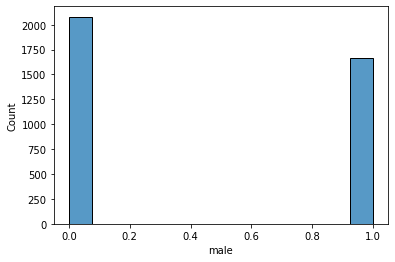

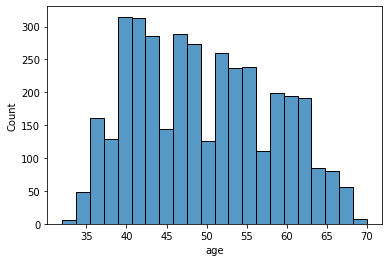

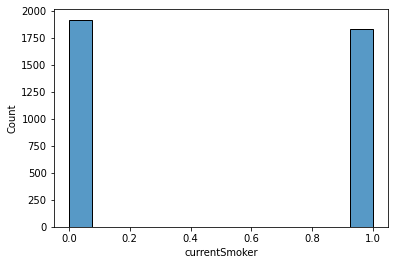

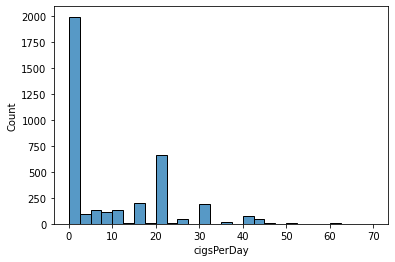

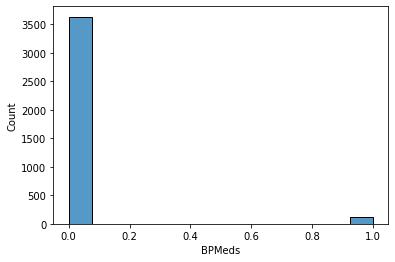

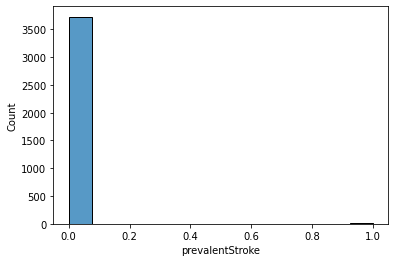

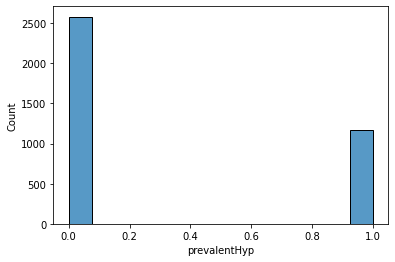

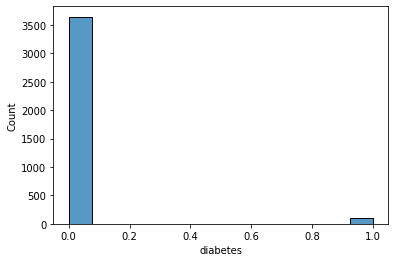

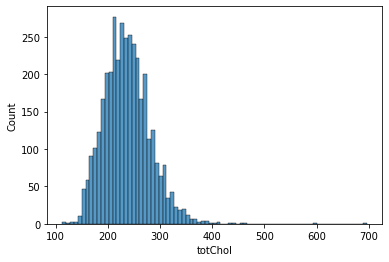

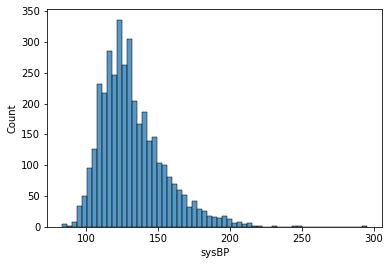

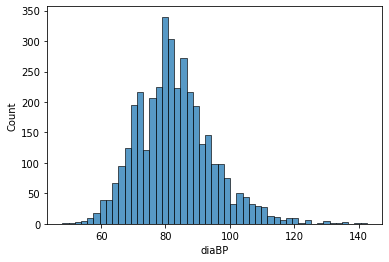

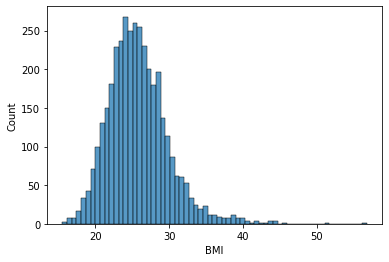

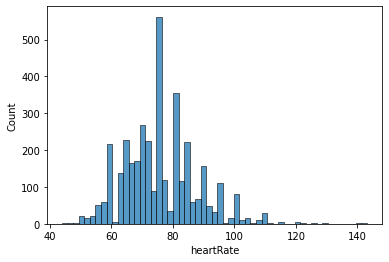

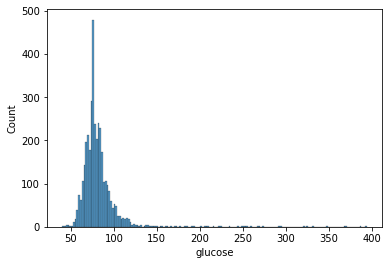

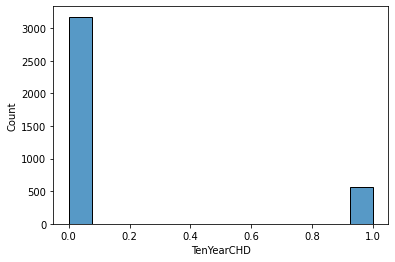

In [ ]:
for column in df_heart_disease.columns:
    sns.histplot(x= column,data = df_heart_disease)
    plt.show()

In [ ]:
df_heart_disease_No = df_heart_disease[df_heart_disease['TenYearCHD']==0].sample(n=600,random_state=2)
df_heart_disease_Yes = df_heart_disease[df_heart_disease['TenYearCHD']==1]
df_heart_disease_sample = pd.concat([df_heart_disease_No,df_heart_disease_Yes],axis=0)
df_heart_disease_sample = df_heart_disease_sample.sample(frac = 1)
df_heart_disease_sample.reset_index( drop=True, inplace=True)
df_heart_disease_sample.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,42,1,20.0,0.0,0,0,0,241.0,118.0,85.0,30.03,68.0,74.0,1
1,0,59,0,0.0,0.0,0,0,0,271.0,117.5,65.0,19.77,70.0,89.0,1
2,1,56,1,30.0,0.0,0,1,0,303.0,136.5,97.0,26.64,93.0,106.0,0
3,1,68,1,15.0,0.0,0,0,0,157.0,106.0,48.0,26.73,65.0,65.0,1
4,1,43,0,0.0,0.0,0,1,0,367.0,141.0,82.5,25.62,92.0,90.0,0


### Train - Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_heart_disease_sample.drop(columns='TenYearCHD'), df_heart_disease_sample['TenYearCHD'] , test_size=0.2, random_state=555555555)

### Model Fitting

The first step when using Tensorflow is to initialize the model. The model we saw in previous examples is a "Sequential" model, so we will ask Tensorflow to initialize it without any layers at first.

In [ ]:
# First, we initialize the model.
model = tf.keras.models.Sequential()

Now, we will add our layers to this empty model. We will first add our input layer, then a couple of hidden layers, and finally our output layer. Notice how we chose to use ReLU functions as our activation function, but we could have just as well chosen one of many others. We choose 10 neurons as our width for no particular reason. Usually, a larger model gives better results, but needs more and more diverse data to work well.

In [ ]:
# First our input layer. For this layer, and this layer only, we need to specify the size of our input. For our dataset this means the amount of columns in our X.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(X_train.shape[1],)))
# Now some hidden layers
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(rate=0.2))
# Finally, our output layer. Since we have 3 possible classes, we need 3 output neurons. 
# For a regression problem, we would have only 1. For an image creation network, we would have as many pixels as the image we wanted to create!
model.add(tf.keras.layers.Dense(3))
# A final layer with several output neurons gives us logits as results. We can do a final pass with a Softmax layer to turn them into percentages.
model.add(tf.keras.layers.Softmax())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
 softmax (Softmax)           (None, 3)                 0

Now, we will decide on an _optimizer_. The optimizer is the algorithm which determines how much we move each weight down the slope we found by backpropagation. There are many possible choices, most of which are based on Stochastic Gradient Descent. [One of the most popular ones right now is "Adam"](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.)

The __learning rate__ is the amount of space we expect to move down the slope on each cycle of learning. The larger this number, the more we move, but the less precise the movement.


In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

Finally, we compile our final model and train with our data.

In [ ]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy',F1])
history = model.fit(X_train.values, Y_train.values,
        validation_data=(X_test.values, Y_test.values),
        epochs = 20,
        batch_size=32)

Epoch 1/20
30/30 [==============================] - 1s 9ms/step - loss: 7.0940 - accuracy: 0.0555 - F1: 0.6420 - val_loss: 7.8394 - val_accuracy: 0.0000e+00 - val_F1: 0.6871
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 5.3462 - accuracy: 0.1281 - F1: 0.6444 - val_loss: 1.7910 - val_accuracy: 0.2979 - val_F1: 0.6907
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 1.4867 - accuracy: 0.3287 - F1: 0.5602 - val_loss: 0.9588 - val_accuracy: 0.3957 - val_F1: 0.3096
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.8437 - accuracy: 0.4429 - F1: 0.2366 - val_loss: 0.8876 - val_accuracy: 0.4979 - val_F1: 0.1865
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.8206 - accuracy: 0.4472 - F1: 0.1509 - val_loss: 0.8359 - val_accuracy: 0.5234 - val_F1: 0.1449
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.7949 - accuracy: 0.4568 - F1: 0.1204 - val_loss: 0.8085 - val_accuracy: 

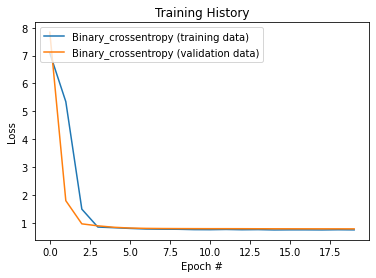

In [ ]:
# Plot history
plt.plot(history.history['loss'], label='Binary_crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Binary_crossentropy (validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

## Model Visualization

In [ ]:
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

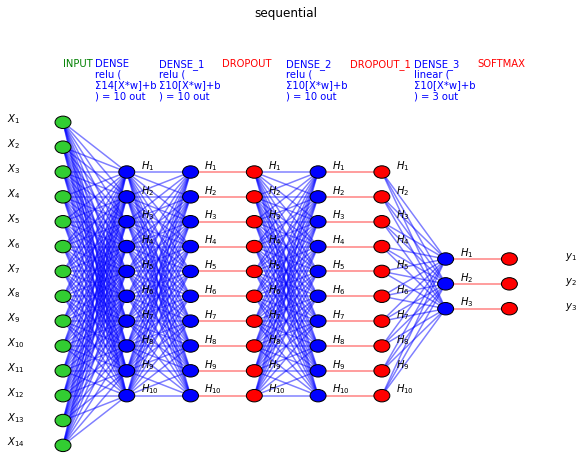

In [ ]:
visualize_nn(model, description=True, figsize=(10,8))

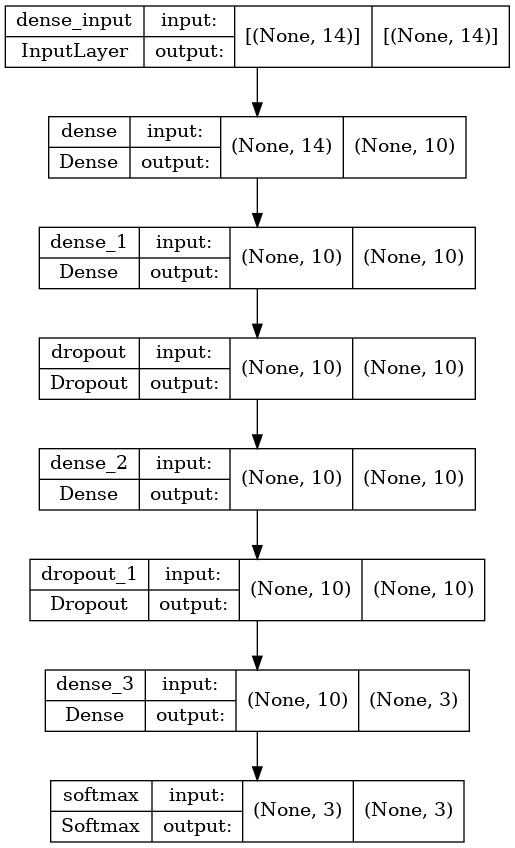

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

#### Examples



https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/machine_learning/example_classification.ipynb


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>